<a href="https://colab.research.google.com/github/starlingomez/preworkmac/blob/master/9_de_diciembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#goga bitzade

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 53.0855 - mae: 6.5475 - val_loss: 46.7130 - val_mae: 6.0837 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.1206 - mae: 5.6494 - val_loss: 32.8415 - val_mae: 4.9809 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.9450 - mae: 4.3671 - val_loss: 18.5021 - val_mae: 3.6138 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.6820 - mae: 3.3277 - val_loss: 10.6041 - val_mae: 2.6734 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.4689 - mae: 3.1109 - val_loss: 8.4480 - val_mae: 2.4208 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.0484 - mae: 2.7228 - val_loss: 8.0572 - val_mae: 2.3747 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.7725 - mae: 2.6839 - val_loss: 7.6653 - val_mae: 2.3207 - learning_rate: 0.0010
Epoch 8/100
2

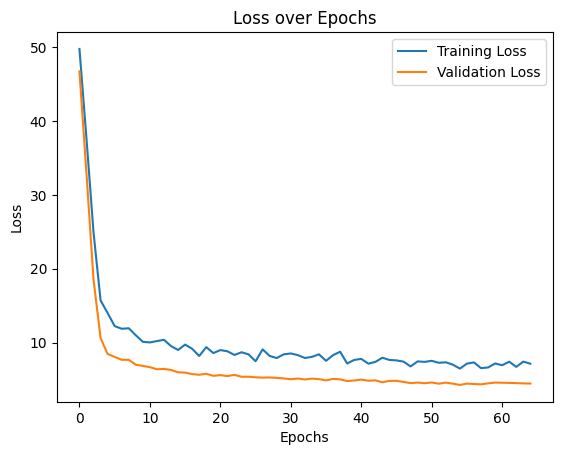

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted total rebounds for the player's next game: 7.26


7.2588415

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [6.9],
    'avg_min_last5': [24.4],
    'opp_avg_reb_allowed': [44],
    'player_avg_reb_vs_opp': [10],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#jalen sugg

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 51.6615 - mae: 6.5686 - val_loss: 48.2084 - val_mae: 6.2302 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.5426 - mae: 5.8698 - val_loss: 35.6166 - val_mae: 5.2360 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.5641 - mae: 4.6012 - val_loss: 21.4797 - val_mae: 3.9663 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.9289 - mae: 3.5437 - val_loss: 11.7380 - val_mae: 2.8508 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.1121 - mae: 3.0501 - val_loss: 8.3027 - val_mae: 2.3984 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.7188 - mae: 2.7770 - val_loss: 7.6535 - val_mae: 2.3134 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.1264 - mae: 2.8787 - val_loss: 7.6464 - val_mae: 2.3233 - learning_rate: 0.0010
Epoch 8/100
2

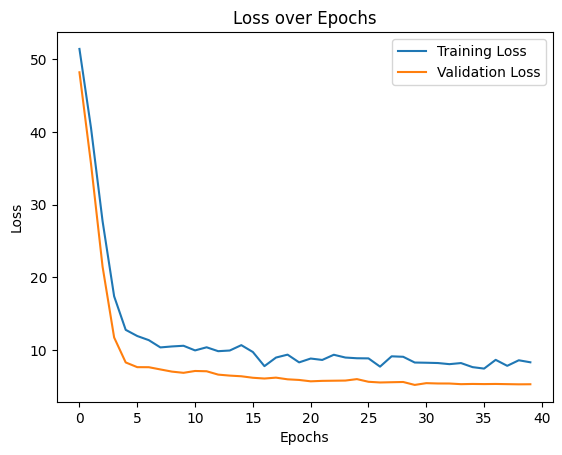

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted total rebounds for the player's next game: 6.09


6.0913663

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [6.9],
    'avg_min_last5': [24.4],
    'opp_avg_reb_allowed': [45.7],
    'player_avg_reb_vs_opp': [10],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#alex sarr

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 49.4752 - mae: 6.3806 - val_loss: 41.8629 - val_mae: 5.7682 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.6848 - mae: 5.1767 - val_loss: 26.5401 - val_mae: 4.4692 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.1566 - mae: 3.8326 - val_loss: 13.1013 - val_mae: 3.0531 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.3766 - mae: 2.9359 - val_loss: 8.3810 - val_mae: 2.4200 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3519 - mae: 2.6618 - val_loss: 7.9340 - val_mae: 2.3729 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8259 - mae: 2.5215 - val_loss: 7.2589 - val_mae: 2.2724 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.7405 - mae: 2.6779 - val_loss: 7.4371 - val_mae: 2.3161 - learning_rate: 0.0010
Epoch 8/100
23/

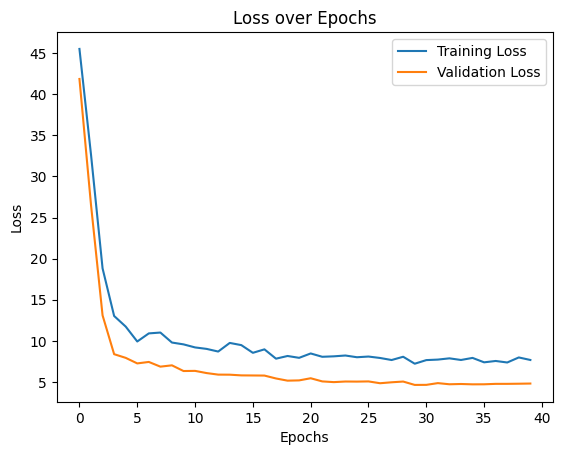

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted total rebounds for the player's next game: 6.16


6.1640887

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [6.8],
    'avg_min_last5': [28],
    'opp_avg_reb_allowed': [43.2],
    'player_avg_reb_vs_opp': [5],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#coulibaly

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 51.0157 - mae: 6.3806 - val_loss: 43.8432 - val_mae: 5.8947 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.7780 - mae: 5.3433 - val_loss: 28.8175 - val_mae: 4.6980 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.0993 - mae: 4.1865 - val_loss: 15.2351 - val_mae: 3.3167 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.4539 - mae: 3.2015 - val_loss: 9.3272 - val_mae: 2.5693 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.9041 - mae: 2.7829 - val_loss: 8.1339 - val_mae: 2.4095 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.2028 - mae: 2.6618 - val_loss: 7.8667 - val_mae: 2.3694 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.6812 - mae: 2.6597 - val_loss: 7.7645 - val_mae: 2.3632 - learning_rate: 0.0010
Ep

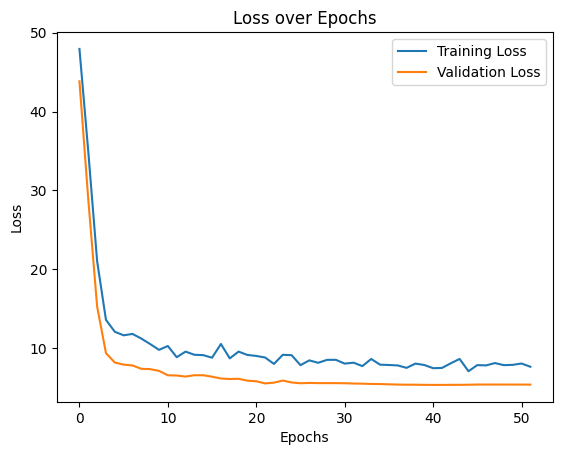

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted total rebounds for the player's next game: 5.54


5.536633

In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [4.8],
    'avg_min_last5': [34.3],
    'opp_avg_reb_allowed': [43.2],
    'player_avg_reb_vs_opp': [3],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#ja morant

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 48.8552 - mae: 6.3009 - val_loss: 43.1060 - val_mae: 5.9041 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 34.9221 - mae: 5.2483 - val_loss: 27.1473 - val_mae: 4.5785 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 23.2673 - mae: 4.0330 - val_loss: 13.1944 - val_mae: 3.0689 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.9494 - mae: 2.9064 - val_loss: 8.1148 - val_mae: 2.3824 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.9106 - mae: 2.6961 - val_loss: 7.2290 - val_mae: 2.2345 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.5460 - mae: 2.6068 - val_loss: 7.2450 - val_mae: 2.2477 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.8808 - mae: 2.6308 - val_loss: 7.1511 - val_mae: 2.2397 - learning_rate: 0.0010
Epoch 8/100


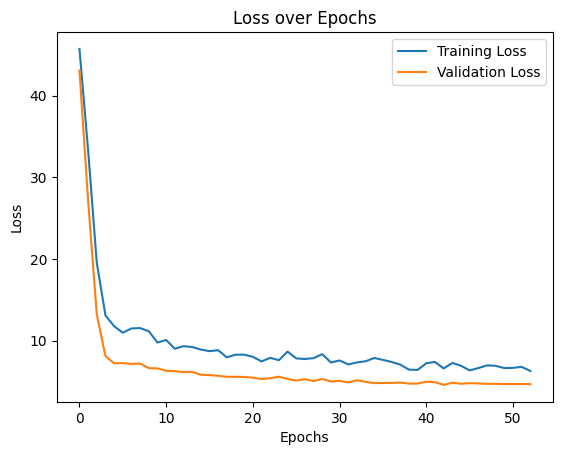

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted total rebounds for the player's next game: 5.29


5.2909303

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [3.5],
    'avg_min_last5': [28.6],
    'opp_avg_reb_allowed': [41.4],
    'player_avg_reb_vs_opp': [6.1],
    'home_indicator': [1],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#jarren jackson

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 45.3204 - mae: 6.0470 - val_loss: 39.9334 - val_mae: 5.5966 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34.4305 - mae: 5.0765 - val_loss: 25.3349 - val_mae: 4.3489 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.1089 - mae: 3.7612 - val_loss: 14.0778 - val_mae: 3.0681 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.1882 - mae: 2.9898 - val_loss: 9.6195 - val_mae: 2.5177 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.8773 - mae: 2.7764 - val_loss: 8.6467 - val_mae: 2.3967 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.1998 - mae: 2.7727 - val_loss: 7.8470 - val_mae: 2.3079 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.7339 - mae: 2.6272 - val_loss: 7.3443 - val_mae: 2.2470 - learning_rate: 0.0010
Epoch 8/100
23

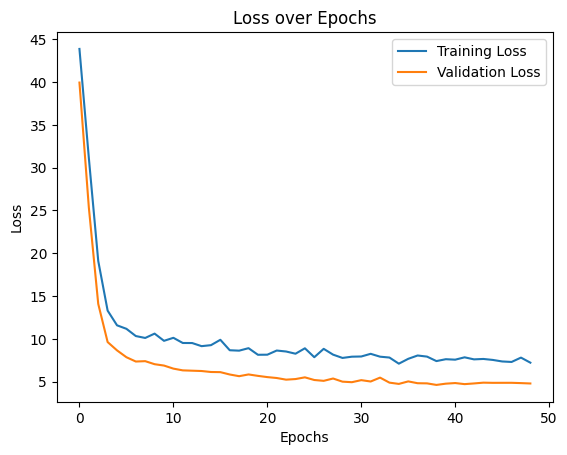

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted total rebounds for the player's next game: 5.83


5.8307405

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [6.2],
    'avg_min_last5': [28.2],
    'opp_avg_reb_allowed': [41.4],
    'player_avg_reb_vs_opp': [6],
    'home_indicator': [1],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#desmond bane

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 53.0874 - mae: 6.6548 - val_loss: 49.7242 - val_mae: 6.3172 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 46.1229 - mae: 6.0403 - val_loss: 37.1101 - val_mae: 5.3576 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.3107 - mae: 4.7345 - val_loss: 23.2095 - val_mae: 4.1423 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.8555 - mae: 3.6340 - val_loss: 12.6998 - val_mae: 3.0126 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.5995 - mae: 3.1292 - val_loss: 8.8969 - val_mae: 2.4671 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.2778 - mae: 2.7759 - val_loss: 7.6905 - val_mae: 2.3048 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.1653 - mae: 2.6295 - val_loss: 7.2256 - val_mae: 2.2474 - learning_rate: 0.0010
E

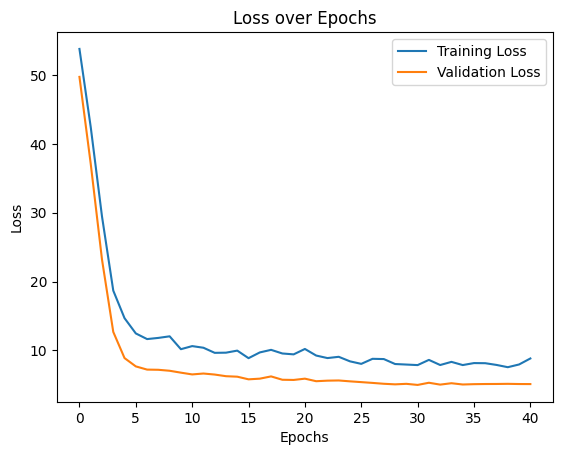

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted total rebounds for the player's next game: 6.06


6.063159

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [5.8],
    'avg_min_last5': [29.3],
    'opp_avg_reb_allowed': [41.4],
    'player_avg_reb_vs_opp': [2],
    'home_indicator': [1],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#brandone clarke

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 50.4932 - mae: 6.4390 - val_loss: 43.7699 - val_mae: 5.9023 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38.0068 - mae: 5.3293 - val_loss: 29.3348 - val_mae: 4.6840 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.5583 - mae: 4.1652 - val_loss: 16.8906 - val_mae: 3.4124 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17.8570 - mae: 3.4010 - val_loss: 10.5207 - val_mae: 2.6893 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 13.5075 - mae: 2.9718 - val_loss: 8.5232 - val_mae: 2.4206 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.6984 - mae: 2.8375 - val_loss: 7.6281 - val_mae: 2.3010 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.7768 - mae: 2.5591 - val_loss: 7.1948 - val_mae: 2.2377 - learning_rate: 0.0010

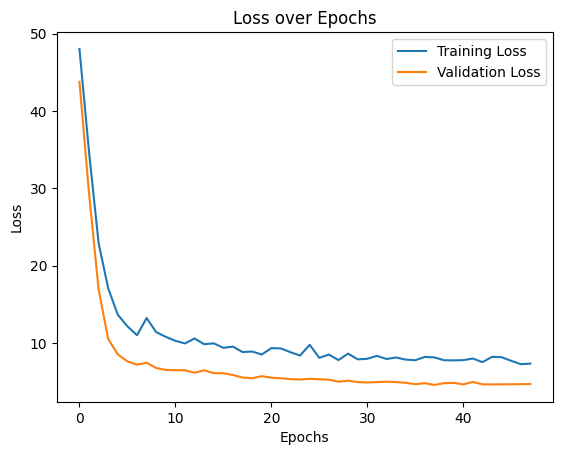

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted total rebounds for the player's next game: 5.97


5.9672933

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [6.4],
    'avg_min_last5': [22],
    'opp_avg_reb_allowed': [41.4],
    'player_avg_reb_vs_opp': [5],
    'home_indicator': [1],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#jimmy butler

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 53.0037 - mae: 6.6298 - val_loss: 47.5541 - val_mae: 6.1811 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 42.6483 - mae: 5.8206 - val_loss: 35.1937 - val_mae: 5.1877 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.9318 - mae: 5.0538 - val_loss: 21.2155 - val_mae: 3.9142 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.9310 - mae: 3.5791 - val_loss: 11.1830 - val_mae: 2.7612 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.1191 - mae: 2.9518 - val_loss: 7.9682 - val_mae: 2.2710 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.2970 - mae: 2.7383 - val_loss: 7.3162 - val_mae: 2.1884 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.1457 - mae: 2.6516 - val_loss: 7.0404 - val_mae: 2.1486 - learning_rate: 0.0010
Epoch 8/100


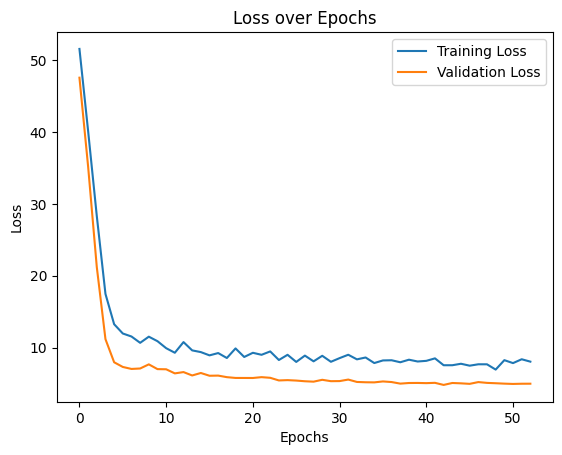

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted total rebounds for the player's next game: 6.25


6.2525687

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [6.3],
    'avg_min_last5': [33.3],
    'opp_avg_reb_allowed': [41.5],
    'player_avg_reb_vs_opp': [4],
    'home_indicator': [1],
    'back_to_back': [1]
})
predict_for_player(model, scaler, player_data)


#sabonis

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 56.1754 - mae: 6.8692 - val_loss: 50.8288 - val_mae: 6.4185 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 46.9249 - mae: 6.1284 - val_loss: 39.0361 - val_mae: 5.5349 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 35.3756 - mae: 5.1775 - val_loss: 25.8316 - val_mae: 4.4073 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.9578 - mae: 4.0644 - val_loss: 14.4489 - val_mae: 3.2113 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 15.3038 - mae: 3.1088 - val_loss: 9.3604 - val_mae: 2.5197 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.6756 - mae: 2.9545 - val_loss: 8.0786 - val_mae: 2.3551 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.1929 - mae: 2.8036 - val_loss: 8.1136 - val_mae: 2.3744 - learning_rate: 0.0010
Epoch 8/10

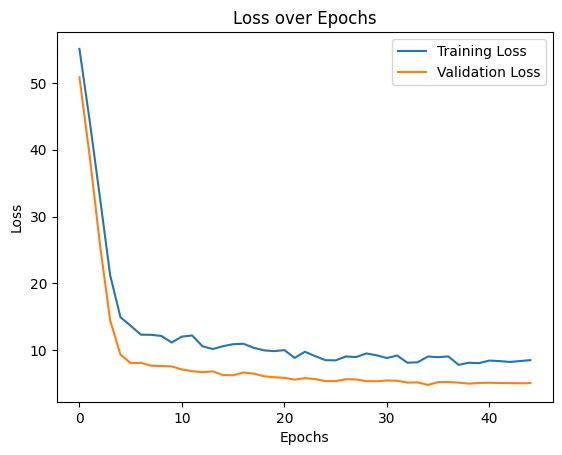

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted total rebounds for the player's next game: 12.78


12.7751875

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [13.1],
    'avg_min_last5': [35.8],
    'opp_avg_reb_allowed': [47.8],
    'player_avg_reb_vs_opp': [11],
    'home_indicator': [0],
    'back_to_back': [1]
})
predict_for_player(model, scaler, player_data)


#kevin heuter

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 55.4460 - mae: 6.7308 - val_loss: 46.4943 - val_mae: 6.0906 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.1567 - mae: 5.6418 - val_loss: 32.3753 - val_mae: 4.9649 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.7001 - mae: 4.3705 - val_loss: 17.7199 - val_mae: 3.5549 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.5915 - mae: 3.2031 - val_loss: 9.2484 - val_mae: 2.5155 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.6593 - mae: 3.0365 - val_loss: 7.8626 - val_mae: 2.3264 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.4107 - mae: 2.9384 - val_loss: 7.4217 - val_mae: 2.2690 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.5771 - mae: 2.7038 - val_loss: 7.2939 - val_mae: 2.2533 - learning_rate: 0.0010
Epoch 8/100
23

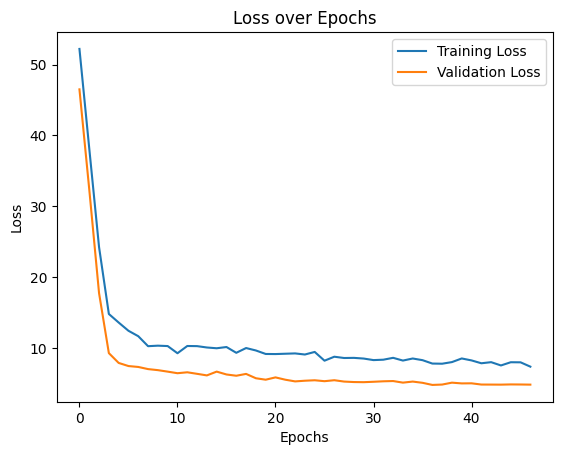

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted total rebounds for the player's next game: 4.00


3.999661

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [3.1],
    'avg_min_last5': [24.9],
    'opp_avg_reb_allowed': [47.8],
    'player_avg_reb_vs_opp': [5],
    'home_indicator': [0],
    'back_to_back': [1]
})
predict_for_player(model, scaler, player_data)


#bam adebayo

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 51.4723 - mae: 6.4316 - val_loss: 44.8321 - val_mae: 5.9504 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 41.0344 - mae: 5.5898 - val_loss: 30.8647 - val_mae: 4.7998 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.6999 - mae: 4.3433 - val_loss: 17.2671 - val_mae: 3.4759 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.7078 - mae: 3.3544 - val_loss: 10.2719 - val_mae: 2.5910 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.9815 - mae: 2.7517 - val_loss: 8.4386 - val_mae: 2.3799 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.1797 - mae: 2.8656 - val_loss: 7.8251 - val_mae: 2.3071 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.8977 - mae: 2.7032 - val_loss: 7.5549 - val_mae: 2.2772 - learning_rate: 0.0010
Epoch 8/100
2

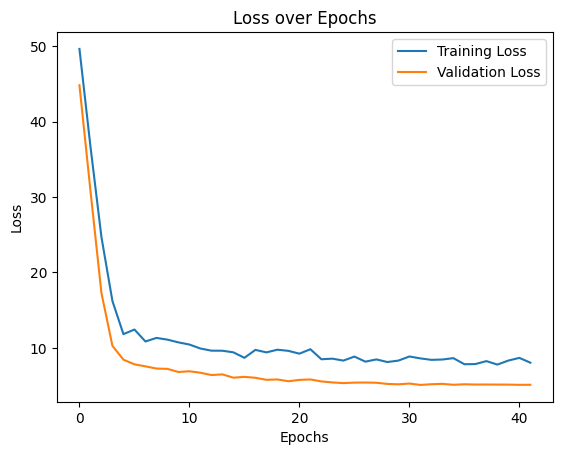

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted total rebounds for the player's next game: 9.72


9.71771

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [10.7],
    'avg_min_last5': [34.2],
    'opp_avg_reb_allowed': [41.5],
    'player_avg_reb_vs_opp': [8.7],
    'home_indicator': [1],
    'back_to_back': [1]
})
predict_for_player(model, scaler, player_data)


#julius randle

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 49.5745 - mae: 6.2839 - val_loss: 40.1046 - val_mae: 5.6417 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.5741 - mae: 5.0380 - val_loss: 24.5112 - val_mae: 4.2972 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.8463 - mae: 3.7556 - val_loss: 11.8453 - val_mae: 2.9036 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.0234 - mae: 3.0295 - val_loss: 7.8464 - val_mae: 2.3364 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.9428 - mae: 2.7846 - val_loss: 7.7968 - val_mae: 2.3427 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.2677 - mae: 2.7497 - val_loss: 7.7231 - val_mae: 2.3400 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3582 - mae: 2.4913 - val_loss: 7.3831 - val_mae: 2.2886 - learning_rate: 0.0010
Epoch 8/100
23/

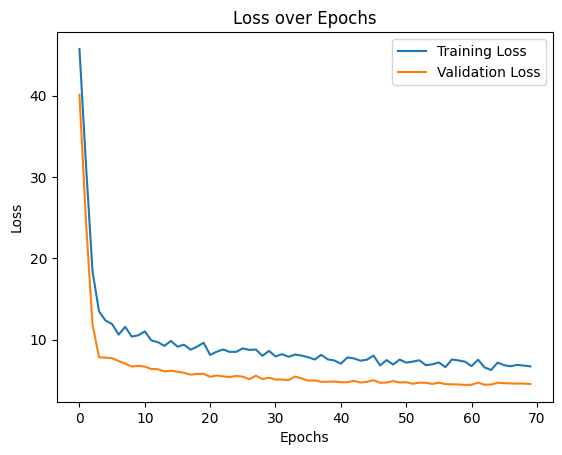

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted total rebounds for the player's next game: 7.45


7.445395

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [6.6],
    'avg_min_last5': [32.5],
    'opp_avg_reb_allowed': [41.4],
    'player_avg_reb_vs_opp': [10.2],
    'home_indicator': [1],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#brook lopez

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 54.0571 - mae: 6.7163 - val_loss: 48.4070 - val_mae: 6.2402 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.8787 - mae: 5.8396 - val_loss: 34.1962 - val_mae: 5.1430 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.2780 - mae: 4.5111 - val_loss: 19.8242 - val_mae: 3.8148 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.9595 - mae: 3.4884 - val_loss: 11.0760 - val_mae: 2.7325 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.8432 - mae: 2.7836 - val_loss: 8.4206 - val_mae: 2.3670 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.0076 - mae: 2.7743 - val_loss: 7.7490 - val_mae: 2.2905 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.0183 - mae: 2.6805 - val_loss: 7.4184 - val_mae: 2.2472 - learning_rate: 0.0010
Epoch 8/100
2

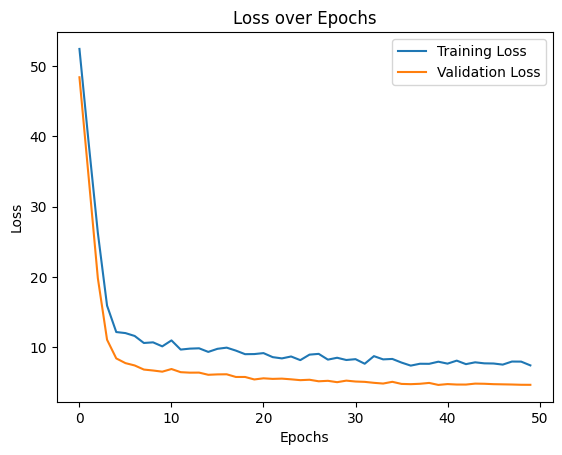

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted total rebounds for the player's next game: 6.00


5.9983134

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [5.6],
    'avg_min_last5': [34.6],
    'opp_avg_reb_allowed': [44],
    'player_avg_reb_vs_opp': [6],
    'home_indicator': [1],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#james harden

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 48.0197 - mae: 6.2956 - val_loss: 37.9744 - val_mae: 5.4715 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.9719 - mae: 4.8368 - val_loss: 21.1200 - val_mae: 3.9289 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.8572 - mae: 3.6582 - val_loss: 11.0545 - val_mae: 2.7295 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.8717 - mae: 2.8428 - val_loss: 8.2401 - val_mae: 2.2986 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.9296 - mae: 2.9535 - val_loss: 8.1190 - val_mae: 2.3109 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.9208 - mae: 2.7506 - val_loss: 7.4251 - val_mae: 2.2070 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.3303 - mae: 2.5702 - val_loss: 7.1243 - val_mae: 2.1741 - learning_rate: 0.0010
Epoch 8/100
23

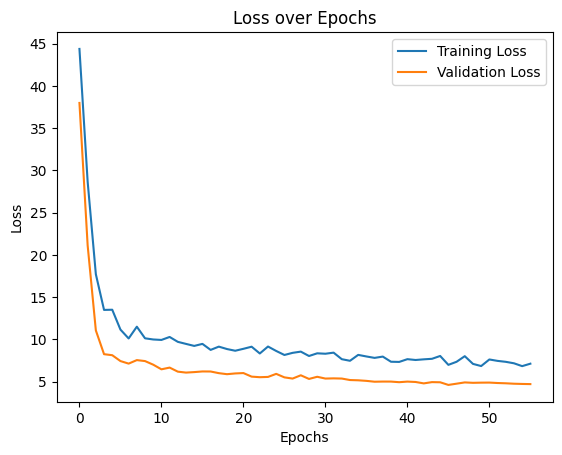

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted total rebounds for the player's next game: 6.44


6.4380474

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [5.2],
    'avg_min_last5': [33.1],
    'opp_avg_reb_allowed': [42.8],
    'player_avg_reb_vs_opp': [6],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#anthony davies

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 50.1274 - mae: 6.3437 - val_loss: 45.6058 - val_mae: 6.0400 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.7277 - mae: 5.5722 - val_loss: 31.1530 - val_mae: 4.8715 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.3689 - mae: 4.1268 - val_loss: 17.1100 - val_mae: 3.5618 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.1379 - mae: 3.2160 - val_loss: 9.4124 - val_mae: 2.5791 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.6848 - mae: 2.8481 - val_loss: 7.1888 - val_mae: 2.2331 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.2357 - mae: 2.5642 - val_loss: 6.5053 - val_mae: 2.1207 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.7191 - mae: 2.7861 - val_loss: 6.8547 - val_mae: 2.1938 - learning_rate: 0.0010
E

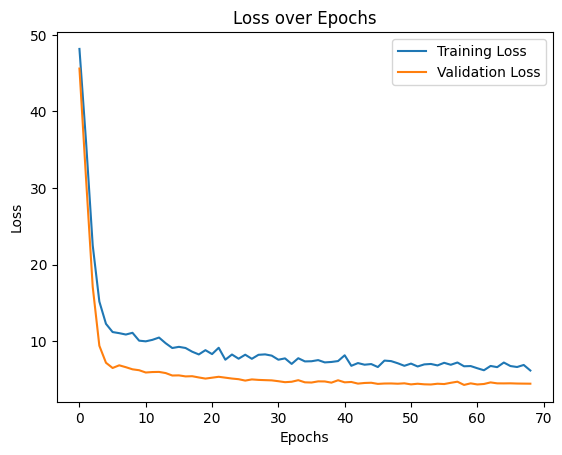

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted total rebounds for the player's next game: 12.32


12.324022

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [11.3],
    'avg_min_last5': [35.9],
    'opp_avg_reb_allowed': [41.6],
    'player_avg_reb_vs_opp': [13.7],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#assist

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data for assists prediction
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features
    opponent_def_rating = np.random.uniform(100, 120, size=num_samples)
    player_minutes_avg_last_10 = np.random.uniform(20, 40, size=num_samples)
    player_usage_rate_last_10 = np.random.uniform(10, 35, size=num_samples)
    player_assists_last_game = np.random.randint(0, 16, size=num_samples)
    player_avg_assists_past_10 = np.random.uniform(0, 10, size=num_samples)

    # Generate target variable (example logic)
    # The next_game_assists may be influenced by past averages, last game performance, and usage rate.
    next_game_assists = (
        0.5 * player_avg_assists_past_10 +
        0.3 * player_assists_last_game +
        0.2 * (player_usage_rate_last_10 / 35) * 16 +
        np.random.normal(0, 2, num_samples)
    )
    # Round and clip assists to a reasonable range (0-15 for this example)
    next_game_assists = np.clip(np.round(next_game_assists), 0, 15)

    data = pd.DataFrame({
        'opponent_def_rating': opponent_def_rating,
        'player_minutes_avg_last_10': player_minutes_avg_last_10,
        'player_usage_rate_last_10': player_usage_rate_last_10,
        'player_assists_last_game': player_assists_last_game,
        'player_avg_assists_past_10': player_avg_assists_past_10,
        'next_game_assists': next_game_assists
    })

    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('next_game_assists', axis=1)
    y = data['next_game_assists']

    # All features are numerical in this case
    numerical_features = X.columns.tolist()

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_scaled = scaler.transform(X_test[numerical_features])

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    # Scale numerical features
    player_scaled = scaler.transform(player_data)
    prediction = model.predict(player_scaled)
    print(f"Predicted total assists for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'opponent_def_rating': [110],
    'player_minutes_avg_last_10': [32.5],
    'player_usage_rate_last_10': [28],
    'player_assists_last_game': [7],
    'player_avg_assists_past_10': [5.5]
})
predict_for_player(model, scaler, player_data)


#d murray

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 48.2066 - mae: 6.2820 - val_loss: 43.2822 - val_mae: 5.9763 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.4283 - mae: 5.5418 - val_loss: 29.5591 - val_mae: 4.8599 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.1237 - mae: 4.4622 - val_loss: 16.2162 - val_mae: 3.5001 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.8047 - mae: 3.1316 - val_loss: 8.4413 - val_mae: 2.4544 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.0759 - mae: 2.7766 - val_loss: 6.6966 - val_mae: 2.1508 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.5150 - mae: 2.6963 - val_loss: 6.2706 - val_mae: 2.0858 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.3111 - mae: 2.5567 - val_loss: 5.8798 - val_mae: 2.0127 - learning_rate: 0.0010
Epoch 8/100
2

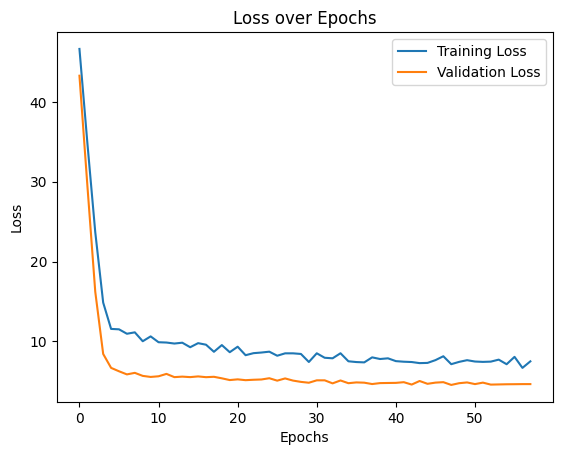

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted total assists for the player's next game: 4.55


4.5483937

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data for assists prediction
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features
    opponent_def_rating = np.random.uniform(100, 120, size=num_samples)
    player_minutes_avg_last_10 = np.random.uniform(20, 40, size=num_samples)
    player_usage_rate_last_10 = np.random.uniform(10, 35, size=num_samples)
    player_assists_last_game = np.random.randint(0, 16, size=num_samples)
    player_avg_assists_past_10 = np.random.uniform(0, 10, size=num_samples)

    # Generate target variable (example logic)
    # The next_game_assists may be influenced by past averages, last game performance, and usage rate.
    next_game_assists = (
        0.5 * player_avg_assists_past_10 +
        0.3 * player_assists_last_game +
        0.2 * (player_usage_rate_last_10 / 35) * 16 +
        np.random.normal(0, 2, num_samples)
    )
    # Round and clip assists to a reasonable range (0-15 for this example)
    next_game_assists = np.clip(np.round(next_game_assists), 0, 15)

    data = pd.DataFrame({
        'opponent_def_rating': opponent_def_rating,
        'player_minutes_avg_last_10': player_minutes_avg_last_10,
        'player_usage_rate_last_10': player_usage_rate_last_10,
        'player_assists_last_game': player_assists_last_game,
        'player_avg_assists_past_10': player_avg_assists_past_10,
        'next_game_assists': next_game_assists
    })

    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('next_game_assists', axis=1)
    y = data['next_game_assists']

    # All features are numerical in this case
    numerical_features = X.columns.tolist()

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_scaled = scaler.transform(X_test[numerical_features])

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    # Scale numerical features
    player_scaled = scaler.transform(player_data)
    prediction = model.predict(player_scaled)
    print(f"Predicted total assists for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'opponent_def_rating': [113.8],
    'player_minutes_avg_last_10': [32.5],
    'player_usage_rate_last_10': [22.7],
    'player_assists_last_game': [5],
    'player_avg_assists_past_10': [5.2]
})
predict_for_player(model, scaler, player_data)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 72.4806 - mae: 8.0948 - val_loss: 66.9252 - val_mae: 7.8133 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.7007 - mae: 7.2647 - val_loss: 54.4540 - val_mae: 6.9863 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.2350 - mae: 6.4092 - val_loss: 39.7333 - val_mae: 5.8564 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.3336 - mae: 5.2359 - val_loss: 23.8126 - val_mae: 4.3777 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.1890 - mae: 4.1744 - val_loss: 11.9408 - val_mae: 2.8578 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.3324 - mae: 3.2484 - val_loss: 6.9393 - val_mae: 2.1066 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.5410 - mae: 3.1891 - val_loss: 5.7209 - val_mae: 1.8999 - learning_rate: 0.0010


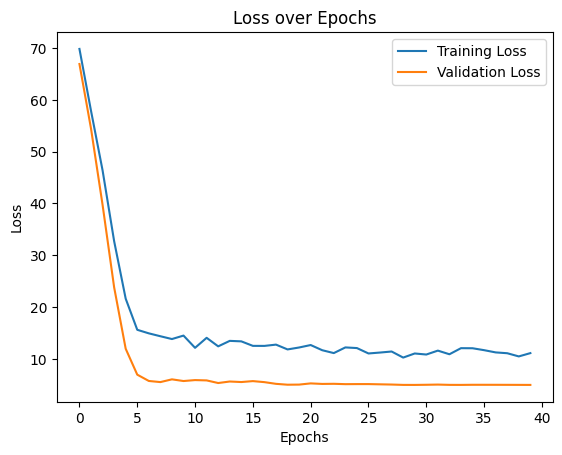

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted total assists for the player's next game: 5.69


5.6910686

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data for assists prediction
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features
    opponent_def_rating = np.random.uniform(100, 120, size=num_samples)
    minute_played_past_10 = np.random.uniform(20, 40, size=num_samples)
    player_usage_rate_last_10 = np.random.uniform(10, 35, size=num_samples)
    player_avg_assists_past_10 = np.random.uniform(0, 10, size=num_samples)

    # Generate target variable (example logic)
    # The next_game_assists may be influenced by past averages, last 10 game minutes played, and usage rate.
    next_game_assists = (
        0.5 * player_avg_assists_past_10 +
        0.3 * (minute_played_past_10 /48) * 18 +
        0.2 * (player_usage_rate_last_10 / 35) * 16 +
        np.random.normal(0, 2, num_samples)
    )
    # Round and clip assists to a reasonable range (0-15 for this example)
    next_game_assists = np.clip(np.round(next_game_assists), 0, 15)

    data = pd.DataFrame({
        'opponent_def_rating': opponent_def_rating,
        'minute_played_past_10': minute_played_past_10,
        'player_usage_rate_last_10': player_usage_rate_last_10,
        'player_avg_assists_past_10': player_avg_assists_past_10,
        'next_game_assists': next_game_assists
    })

    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('next_game_assists', axis=1)
    y = data['next_game_assists']

    # All features are numerical
    numerical_features = X.columns.tolist()

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_scaled = scaler.transform(X_test[numerical_features])

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    # Scale numerical features
    player_scaled = scaler.transform(player_data)
    prediction = model.predict(player_scaled)
    print(f"Predicted total assists for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'opponent_def_rating': [113.8],
    'minute_played_past_10': [32.5],
    'player_usage_rate_last_10': [22.7],
    'player_avg_assists_past_10': [5.2]
})
predict_for_player(model, scaler, player_data)


#anthony davis

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 50.1274 - mae: 6.3437 - val_loss: 45.6058 - val_mae: 6.0400 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.7277 - mae: 5.5722 - val_loss: 31.1530 - val_mae: 4.8715 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.3689 - mae: 4.1268 - val_loss: 17.1100 - val_mae: 3.5618 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.1379 - mae: 3.2160 - val_loss: 9.4124 - val_mae: 2.5791 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.6848 - mae: 2.8481 - val_loss: 7.1888 - val_mae: 2.2331 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.2357 - mae: 2.5642 - val_loss: 6.5053 - val_mae: 2.1207 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.7191 - mae: 2.7861 - val_loss: 6.8547 - val_mae: 2.1938 - learning_rate: 0.0010
E

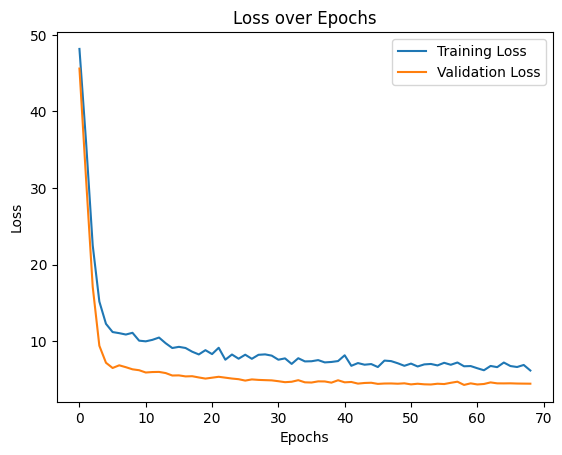

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted total rebounds for the player's next game: 12.32


12.324022

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [11.3],
    'avg_min_last5': [35.9],
    'opp_avg_reb_allowed': [41.6],
    'player_avg_reb_vs_opp': [13.7],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)
